# RNN with Numpy

![alt text](./images/rnn.jpg "the structure of the rnn") 




## Data

In [10]:
%pylab inline
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler

Populating the interactive namespace from numpy and matplotlib


In [11]:
# Load Data
data = pd.read_csv('../../data/time-series/international-airline-passengers.csv', 
                   names=['passenger'],
                   skiprows=1, usecols=[1])

# Normalize Data using Min-Max Scaler 
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
data = data.astype('float32')

# Seperate Train and Test Data
_size = int(len(data) * 0.7) # 144
train, test = data[:_size], data[_size:] # 100, 44

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i])
        dataY.append(dataset[i+1])
    return np.array(dataX), np.array(dataY)

def reshape_x(dataset):
    return np.reshape(dataset, (dataset.shape[0], 1, dataset.shape[1]))

def reshape_y(dataset):
    return np.reshape(dataset, (dataset.shape[0], dataset.shape[1]))

look_back = 1
train_x, train_y = create_dataset(train, look_back)
test_x, test_y = create_dataset(test, look_back)

train_x = reshape_x(train_x)
train_y = reshape_y(train_y)
test_x = reshape_x(test_x)
test_y = reshape_y(test_y) 

Train X: (98, 1, 1)
Train Y: (98, 1)
Test X: (42, 1, 1)
Test Y: (42, 1)


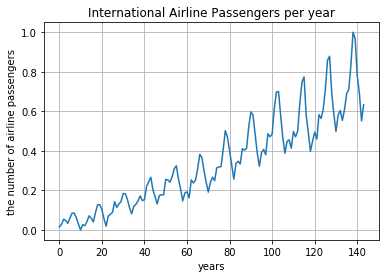

In [13]:
print('Train X:', train_x.shape)
print('Train Y:', train_y.shape)
print('Test X:', test_x.shape)
print('Test Y:', test_y.shape)

title('International Airline Passengers per year')
ylabel('the number of airline passengers')
xlabel('years')
grid()
plot(data)

In [ ]:
class RNN(object):
    def __init__(self):
        